In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(9.7,6.27)})

In [2]:
#Importing data set
df=pd.read_csv('datasets/nobel.csv')
#Display a part of the data
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
#Shape of the data
df.shape

(911, 18)

In [4]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [5]:
#Missing values
df.isna().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

In [6]:
#Cleaning the data
df['birth_date'].fillna('1940-01-04',inplace=True)
df['motivation'].fillna('''for the discovery of the
                        connection between collective
                        motion and particle motion in
                        atomic nuclei and the development
                        of the theory of the structure of
                        the atomic nucleus based on this 
                        connection''',inplace=True)
df['birth_city'].fillna('New York, NY',inplace=True)
df['birth_country'].fillna('United States of America',inplace=True)
df['sex'].fillna('Male',inplace=True)
df['organization_name'].fillna('University of California',inplace=True)
df['organization_city'].fillna('Cambridge, MA',inplace=True)
df['organization_country'].fillna('United States of America',inplace=True)
df['death_date'].fillna('1934-07-04',inplace=True)
df['death_city'].fillna('Paris',inplace=True)
df['death_country'].fillna('United States of America',inplace=True)

In [7]:
#Data are clean
df.isna().sum()

year                    0
category                0
prize                   0
motivation              0
prize_share             0
laureate_id             0
laureate_type           0
full_name               0
birth_date              0
birth_city              0
birth_country           0
sex                     0
organization_name       0
organization_city       0
organization_country    0
death_date              0
death_city              0
death_country           0
dtype: int64

In [8]:
#Number of people whose take a prize in each category
df.groupby('category').count()['prize']

category
Chemistry     175
Economics      78
Literature    113
Medicine      211
Peace         130
Physics       204
Name: prize, dtype: int64

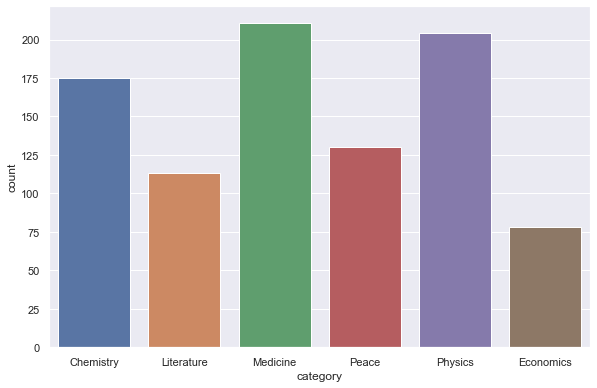

In [9]:
#Medicine is the highest category has prizes
sns.countplot(data=df,x='category');

In [10]:
#Most people are individual
df['laureate_type'].value_counts()

Individual      881
Organization     30
Name: laureate_type, dtype: int64

In [11]:
#Number of people whose are individuals and took the prize completely for themselves
len(df[(df['laureate_type']=='Individual')&(df['prize_share']=='1/1')])

325

In [14]:
#Calculating the age of each person
df['age']=df.year - pd.to_datetime(df.birth_date).dt.year
cnt=0
for val in df['age']:
    if val<1:
        df['age'].iloc[cnt]=-1*val
    cnt+=1

In [15]:
df.head(3)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,49
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,University of California,"Cambridge, MA",United States of America,1907-09-07,Châtenay,France,62
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,47


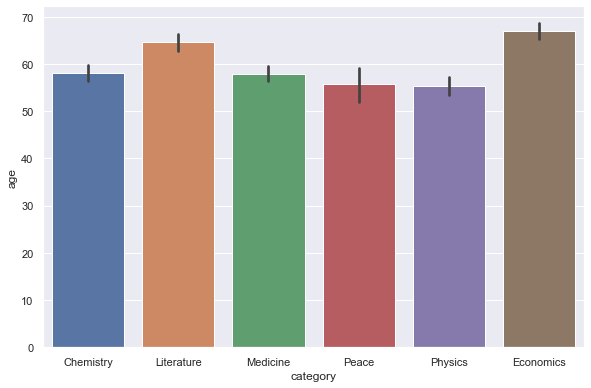

In [56]:
#The mean age of laureates for each category
sns.barplot(data=df,x='category',y='age');

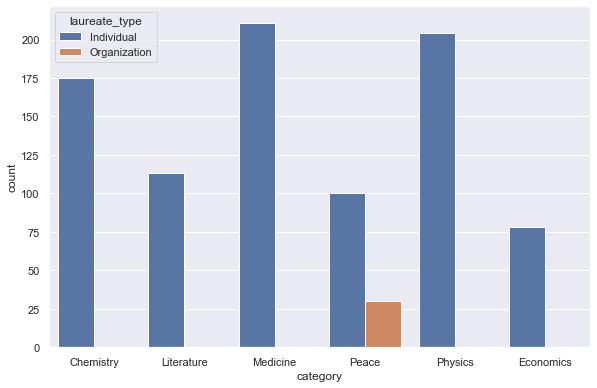

In [133]:
#Laureate type in each category
#Individuals are dominant
sns.countplot(data=df,x='category',hue='laureate_type',palette='deep');

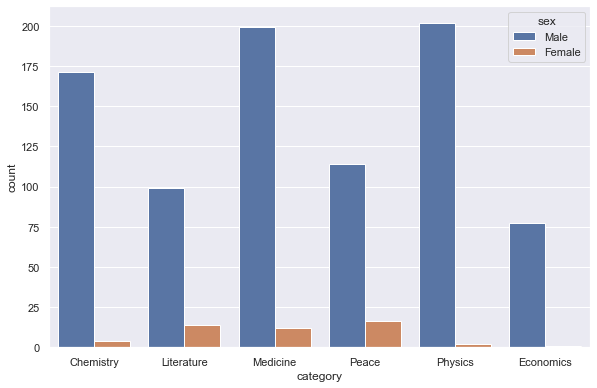

In [137]:
#Males are dominant in each category
sns.countplot(data=df,x='category',hue='sex',palette='deep');

In [144]:
#10 countries with the most award
df['birth_country'].value_counts()[:10]

United States of America    285
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Russia                       17
Italy                        17
Name: birth_country, dtype: int64

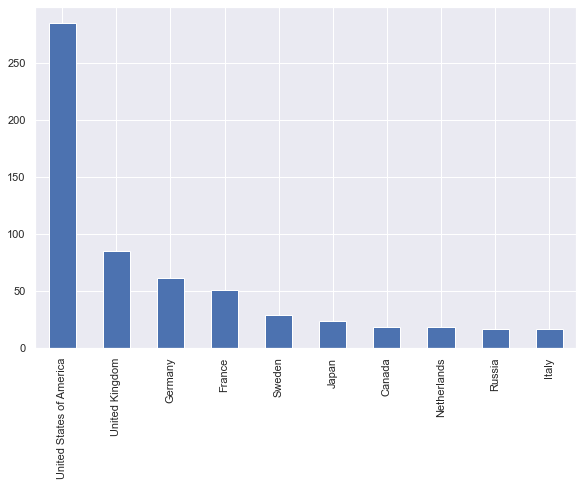

In [150]:
#US dominate on taking prizes
df['birth_country'].value_counts().head(10).plot(kind='bar');

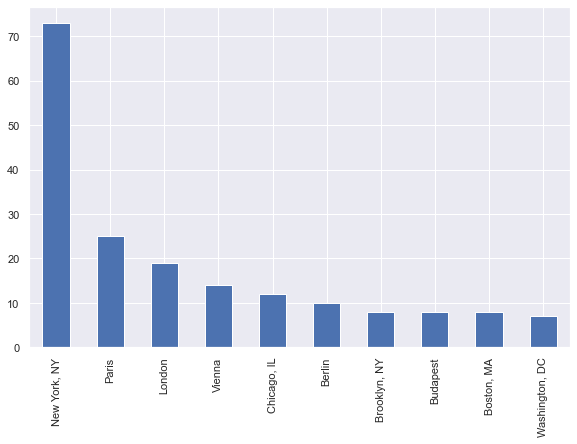

In [152]:
#New York dominate on taking prizes
df['birth_city'].value_counts().head(10).plot(kind='bar');

In [155]:
#The ages of the youngest and oldest winner for each year
df.groupby('year')['age'].agg([min,max])

,min,max
year,,
1901,47,79
1902,37,85
1903,36,75
1904,-36,74
1905,43,70
...,...,...
2012,50,89
2013,58,84
2014,17,85


In [175]:
#The first woman win nobel and her category
df[df['sex']=='Female'].sort_values(by='year',ascending=True).head(1)[['full_name','category']]

,full_name,category
19,"Marie Curie, née Sklodowska",Physics


In [205]:
#People whose won more nobel prizes
cnts=df['full_name'].value_counts()
cnts.loc[cnts>1]

Comité international de la Croix Rouge (International Committee of the Red Cross)    3
John Bardeen                                                                         2
Marie Curie, née Sklodowska                                                          2
Linus Carl Pauling                                                                   2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Frederick Sanger                                                                     2
Name: full_name, dtype: int64

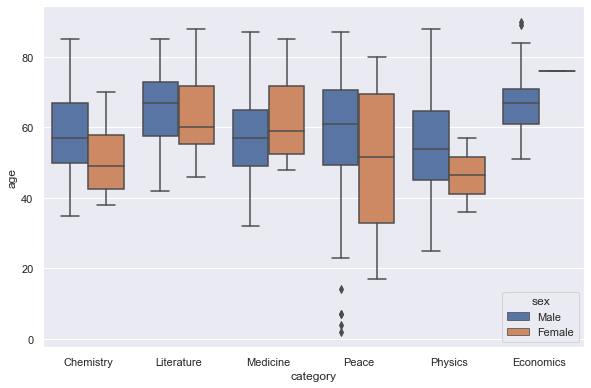

In [225]:
#For each gender for each category,the distribution of age
sns.boxplot(data=df,x='category',y='age',hue='sex');

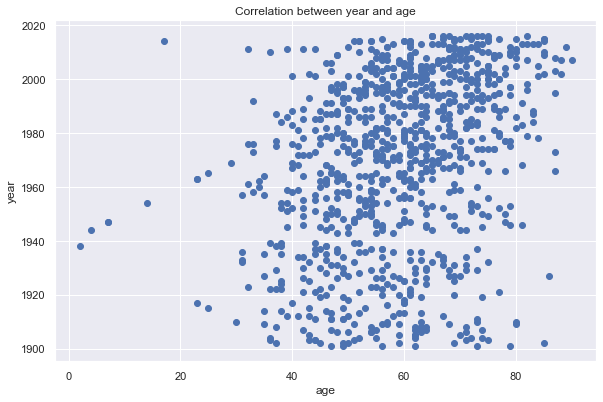

In [44]:
#It seems like weak positive correlation
plt.scatter(x=df['age'],y=df['year']);
plt.xlabel('age')
plt.ylabel('year')
plt.title('Correlation between year and age')
plt.show()